In [4]:
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
%matplotlib inline

In [5]:
# Read the dataset
dataset = pd.read_csv("Pregnancy.csv")

In [6]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,NaN,20 - 39,Low weight,First trimester (0-3 months),First pregnancy,Yes,No,NaN,Once,...,Not so good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,NaN,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,40 and above,Medium weight,Second trimester (3-6 months),Third pregnancy,No,Yes,Medical,Two times,...,Good,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,20 - 39,Medium weight,First trimester (0-3 months),First pregnancy,No,No,NaN,NaN,...,Good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,40 and above,Overweight,Third trimester (6-9 months),Second pregnancy,No,Yes,Medical,Once,...,Good,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,40 and above,Overweight,First trimester (0-3 months),More than three pregnancies,Yes,No,NaN,Once,...,Not so good,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [7]:
dataset.isnull().sum()

Timestamp                                                           0
Username                                                           25
Age                                                                 0
Body Mass Index (BMI)                                               0
Age of pregnancy                                                    0
Pregnancy frequency                                                 2
Have you ever had a miscarriage                                     2
Have you ever had an abortion                                       4
Which type of abortion                                             46
If yes how many times (miscarriage and abortion)                   36
When was your last pregnancy after delivery                        27
When was your last pregnancy (miscarriage and abortion)            38
Hormonal status                                                     0
Diabetes status                                                     0
Blood pressure statu

In [8]:
#Now Replacing 
dataset['Username']=dataset['Username'].fillna(dataset['Username'].mode()[0])

In [9]:
# Check the first 5 rows of the data
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,20 - 39,Low weight,First trimester (0-3 months),First pregnancy,Yes,No,NaN,Once,...,Not so good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,NaN,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,40 and above,Medium weight,Second trimester (3-6 months),Third pregnancy,No,Yes,Medical,Two times,...,Good,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,20 - 39,Medium weight,First trimester (0-3 months),First pregnancy,No,No,NaN,NaN,...,Good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,40 and above,Overweight,Third trimester (6-9 months),Second pregnancy,No,Yes,Medical,Once,...,Good,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,40 and above,Overweight,First trimester (0-3 months),More than three pregnancies,Yes,No,NaN,Once,...,Not so good,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [10]:
#Now Replacing 
dataset['Which family planning method do you use?']=dataset['Which family planning method do you use?'].fillna(dataset['Which family planning method do you use?'].mode()[0])

In [11]:
#Now Replacing 
dataset['When was your last pregnancy after delivery']=dataset['When was your last pregnancy after delivery'].fillna(dataset['When was your last pregnancy after delivery'].mode()[0])

In [12]:
#Now Replacing 
dataset['Unnamed: 20']=dataset['Unnamed: 20'].fillna(dataset['Unnamed: 20'].mode()[0])

In [13]:
dataset.isnull().sum()

Timestamp                                                           0
Username                                                            0
Age                                                                 0
Body Mass Index (BMI)                                               0
Age of pregnancy                                                    0
Pregnancy frequency                                                 2
Have you ever had a miscarriage                                     2
Have you ever had an abortion                                       4
Which type of abortion                                             46
If yes how many times (miscarriage and abortion)                   36
When was your last pregnancy after delivery                         0
When was your last pregnancy (miscarriage and abortion)            38
Hormonal status                                                     0
Diabetes status                                                     0
Blood pressure statu

In [14]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Body Mass Index (BMI)']=dataset['Body Mass Index (BMI)'].map({'Low weight':0,'Medium weight':1,'Overweight':2})

In [15]:
print(dataset.groupby('Have you ever had a miscarriage').size())

Have you ever had a miscarriage
No     65
Yes    35
dtype: int64


In [16]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Have you ever had an abortion']=dataset['Have you ever had a miscarriage'].map({'No':0,'Yes':1})

In [17]:
print(dataset.groupby('Have you ever had an abortion').size())

Have you ever had an abortion
0.0    65
1.0    35
dtype: int64


In [18]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Have you ever had an abortion']=dataset['Have you ever had an abortion'].map({'No':0,'Yes':1})

In [19]:
print(dataset.groupby('Which type of abortion').size())

Which type of abortion
Forced     18
Medical    20
Others     18
dtype: int64


In [20]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Which type of abortion']=dataset['Which type of abortion'].map({'Forced':0,'Medical':1,'Others':2})

In [21]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,20 - 39,0,First trimester (0-3 months),First pregnancy,Yes,NaN,NaN,Once,...,Not so good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,40 and above,1,Second trimester (3-6 months),Third pregnancy,No,NaN,1.0,Two times,...,Good,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,20 - 39,1,First trimester (0-3 months),First pregnancy,No,NaN,NaN,NaN,...,Good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,40 and above,2,Third trimester (6-9 months),Second pregnancy,No,NaN,1.0,Once,...,Good,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,40 and above,2,First trimester (0-3 months),More than three pregnancies,Yes,NaN,NaN,Once,...,Not so good,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [22]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Age']=dataset['Age'].map({'Below 20':0,'20 - 39':1,'40 and above':2})

In [23]:
print(dataset.groupby('Age of pregnancy').size())

Age of pregnancy
First trimester (0-3 months)      38
Second  trimester (3-6 months)    42
Third trimester (6-9 months)      22
dtype: int64


In [24]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Age of pregnancy']=dataset['Age of pregnancy'].map({'First trimester (0-3 months)':0,'Second  trimester (3-6 months)':1,'Third trimester (6-9 months)':2})

In [25]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,Not so good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,Good,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,Good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,Good,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,Not so good,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [26]:
print(dataset.groupby('When was your last pregnancy after delivery').size())

When was your last pregnancy after delivery
2 - 5 years      30
Above 5 years    13
Below 1 year     59
dtype: int64


In [27]:
#Replaceing VALUERS in categorical features   TEAM
dataset['When was your last pregnancy after delivery']=dataset['When was your last pregnancy after delivery'].map({'2 - 5 years ':0,'Above 5 years':1,'Below 1 year':2})

In [28]:
print(dataset.groupby('When was your last pregnancy (miscarriage and abortion)').size())

When was your last pregnancy (miscarriage and abortion)
3 - 6 months          30
Below 3 month         19
More than 6 months    15
dtype: int64


In [29]:
#Replaceing VALUERS in categorical features   TEAM
dataset['When was your last pregnancy (miscarriage and abortion)']=dataset['When was your last pregnancy (miscarriage and abortion)'].map({'3 - 6 months':0,'Below 3 month':1,'More than 6 months':2})

In [30]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,Not so good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,Good,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,Good,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,Good,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,Not so good,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [31]:
print(dataset.groupby('Diabetes status').size())

Diabetes status
High blood sugar (diabetes mellitus)     31
Low blood sugar ( diabetes inspidius)    18
Normal blood sugar                       53
dtype: int64


In [32]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Hormonal status']=dataset['Hormonal status'].map({'High blood sugar (diabetes mellitus)':0,'Low blood sugar ( diabetes inspidius)':1,'Normal blood sugar ':2})

In [33]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,NaN,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,NaN,Low blood sugar ( diabetes inspidius),High blood pressure,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,Normal blood sugar,Normal blood pressure,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,NaN,High blood sugar (diabetes mellitus),Low blood pressure,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,NaN,High blood sugar (diabetes mellitus),High blood pressure,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [34]:
print(dataset.groupby('Blood pressure status').size())

Blood pressure status
High blood pressure      26
Low blood pressure       21
Normal blood pressure    55
dtype: int64


In [35]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Blood pressure status']=dataset['Blood pressure status'].map({'High blood pressure ':3,'Low blood pressure':1,'Normal blood pressure':2})

In [36]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,NaN,Normal blood sugar,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,NaN,Low blood sugar ( diabetes inspidius),NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,Normal blood sugar,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,NaN,High blood sugar (diabetes mellitus),1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,NaN,High blood sugar (diabetes mellitus),NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [37]:
print(dataset.groupby('Diabetes status').size())

Diabetes status
High blood sugar (diabetes mellitus)     31
Low blood sugar ( diabetes inspidius)    18
Normal blood sugar                       53
dtype: int64


In [38]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Diabetes status']=dataset['Diabetes status'].map({'High blood sugar (diabetes mellitus)':0,'Low blood sugar ( diabetes inspidius)':1,'Normal blood sugar':2})

In [39]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [40]:
print(dataset.groupby('Which family planning method do you use?').size())

Which family planning method do you use?
Calendar                         42
Emergency oral contraceptives     9
IUD's                            11
Injection                        23
Other methods                    17
dtype: int64


In [41]:
dataset.head()

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [42]:
dataset.drop('Which family planning method do you use?',axis=1)

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,When was your last pregnancy (miscarriage and abortion),Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,0.0,NaN,2,2.0,No,Negative,I use natural methods,None of the above,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,2.0,NaN,1,NaN,No,Negative,Regular ( more than 3 times per year),None of the above,Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,NaN,2,2.0,No,Negative,I use natural methods,None of the above,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,2.0,NaN,0,1.0,Yes,Positive,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,2.0,NaN,0,NaN,No,Negative,I use natural methods,Cardiovascular disease,Option 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023/02/09 9:22:36 PM GMT+3,mimi@gmail.com,1,1,1,Second pregnancy,Yes,NaN,1.0,Three times,...,2.0,NaN,0,2.0,No,Not sure,Regular ( more than 3 times per year),Cancer,Option 1,1
98,2023/02/09 9:22:48 PM GMT+3,mimi@gmail.com,0,0,0,Second pregnancy,Yes,NaN,1.0,More than that,...,2.0,NaN,1,2.0,Yes,Negative,I use natural methods,Sclerosis,Option 1,1
99,2023/02/09 9:23:24 PM GMT+3,mimi@gmail.com,0,1,1,Second pregnancy,Yes,NaN,1.0,Once,...,0.0,NaN,0,NaN,Yes,Positive,Regular ( more than 3 times per year),Sclerosis,Option 1,1
100,2023/02/09 9:24:36 PM GMT+3,mimi@gmail.com,1,0,0,More than three pregnancies,Yes,NaN,0.0,Two times,...,1.0,NaN,0,2.0,No,Negative,Regular ( more than 3 times per year),Thyroid disease,Option 1,0


In [43]:
dataset.drop('Chronic diseases (non communicable diseases)',axis=1)

,Timestamp,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),...,When was your last pregnancy (miscarriage and abortion),Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Unnamed: 20,results
0,2023/02/07 2:16:39 PM GMT+3,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,...,0.0,NaN,2,2.0,No,Negative,Other methods,I use natural methods,Option 1,0
1,2023/02/07 2:23:23 PM GMT+3,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,...,2.0,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),Option 1,1
2,2023/02/07 2:48:02 PM GMT+3,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,...,NaN,NaN,2,2.0,No,Negative,Other methods,I use natural methods,Option 1,0
3,2023/02/07 2:49:27 PM GMT+3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,...,2.0,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),Option 1,1
4,2023/02/07 2:54:13 PM GMT+3,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,...,2.0,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Option 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2023/02/09 9:22:36 PM GMT+3,mimi@gmail.com,1,1,1,Second pregnancy,Yes,NaN,1.0,Three times,...,2.0,NaN,0,2.0,No,Not sure,Injection,Regular ( more than 3 times per year),Option 1,1
98,2023/02/09 9:22:48 PM GMT+3,mimi@gmail.com,0,0,0,Second pregnancy,Yes,NaN,1.0,More than that,...,2.0,NaN,1,2.0,Yes,Negative,Calendar,I use natural methods,Option 1,1
99,2023/02/09 9:23:24 PM GMT+3,mimi@gmail.com,0,1,1,Second pregnancy,Yes,NaN,1.0,Once,...,0.0,NaN,0,NaN,Yes,Positive,Injection,Regular ( more than 3 times per year),Option 1,1
100,2023/02/09 9:24:36 PM GMT+3,mimi@gmail.com,1,0,0,More than three pregnancies,Yes,NaN,0.0,Two times,...,1.0,NaN,0,2.0,No,Negative,Injection,Regular ( more than 3 times per year),Option 1,0


In [44]:
dataset = dataset.drop('Timestamp',axis=1)

In [45]:
dataset.head()

,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,...,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,...,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,...,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [46]:
dataset.head()

,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD's in the past 6 months?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,...,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,...,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,...,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [47]:
dataset.rename(columns={"Have you ever had STD's in the past 6 months?":"Have you ever had STD?"},inplace=True)

In [48]:
dataset.head()

,Username,Age,Body Mass Index (BMI),Age of pregnancy,Pregnancy frequency,Have you ever had a miscarriage,Have you ever had an abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,...,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,...,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,...,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,...,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,...,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [49]:
dataset.rename(columns={"Body Mass Index (BMI)":"Body Mass Index"},inplace=True)
dataset.rename(columns={"Have you ever had a miscarriage":"miscarriage"},inplace=True)
dataset.rename(columns={"Have you ever had an abortion":"abortion"},inplace=True)

In [50]:
dataset = dataset.drop('When was your last pregnancy (miscarriage and abortion)',axis=1)

In [51]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,Frequency of usage family planning methods (artificial methods),Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [52]:
dataset.rename(columns={"Frequency of usage family planning methods (artificial methods)":"family planning"},inplace=True)

In [53]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,NaN,1,NaN,No,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,NaN,2,2.0,No,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,NaN,0,1.0,Yes,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,NaN,0,NaN,No,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [54]:
# see the column names and its datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Username                                          102 non-null    object 
 1   Age                                               102 non-null    int64  
 2   Body Mass Index                                   102 non-null    int64  
 3   Age of pregnancy                                  102 non-null    int64  
 4   Pregnancy frequency                               100 non-null    object 
 5   miscarriage                                       100 non-null    object 
 6   abortion                                          0 non-null      float64
 7   Which type of abortion                            56 non-null     float64
 8   If yes how many times (miscarriage and abortion)  66 non-null     object 
 9   When was your last pr

In [55]:
print(dataset.groupby('Have you ever had STD?').size())

Have you ever had STD?
Maybe    14
No       51
Yes      37
dtype: int64


In [56]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Have you ever had STD?']=dataset['Have you ever had STD?'].map({'No':0,'Yes':1,'Maybe':2})

In [57]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [58]:
print(dataset.groupby('results').size())

results
0    58
1    44
dtype: int64


In [59]:
dataset.isnull().sum()

Username                                              0
Age                                                   0
Body Mass Index                                       0
Age of pregnancy                                      0
Pregnancy frequency                                   2
miscarriage                                           2
abortion                                            102
Which type of abortion                               46
If yes how many times (miscarriage and abortion)     36
When was your last pregnancy after delivery          30
Hormonal status                                     102
Diabetes status                                       0
Blood pressure status                                26
Have you ever had STD?                                0
HIV status                                            0
Which family planning method do you use?              0
family planning                                       0
Chronic diseases (non communicable diseases)    

In [60]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [61]:
dataset.isnull().sum()

Username                                              0
Age                                                   0
Body Mass Index                                       0
Age of pregnancy                                      0
Pregnancy frequency                                   2
miscarriage                                           2
abortion                                            102
Which type of abortion                               46
If yes how many times (miscarriage and abortion)     36
When was your last pregnancy after delivery          30
Hormonal status                                     102
Diabetes status                                       0
Blood pressure status                                26
Have you ever had STD?                                0
HIV status                                            0
Which family planning method do you use?              0
family planning                                       0
Chronic diseases (non communicable diseases)    

In [62]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,If yes how many times (miscarriage and abortion),When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,Once,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,Two times,NaN,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,Once,NaN,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,Once,1.0,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [63]:
dataset = dataset.drop('If yes how many times (miscarriage and abortion)',axis=1)

In [64]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,When was your last pregnancy after delivery,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,NaN,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,NaN,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,1.0,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [65]:
dataset = dataset.drop('When was your last pregnancy after delivery',axis=1)

In [66]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,Yes,NaN,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,No,NaN,1.0,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,No,NaN,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,No,NaN,1.0,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,Yes,NaN,NaN,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [67]:
print(dataset.groupby('miscarriage').size())

miscarriage
No     65
Yes    35
dtype: int64


In [68]:
#Replaceing VALUERS in categorical features   TEAM
dataset['miscarriage']=dataset['miscarriage'].map({'No':0,'Positive':1,'Yes':2})

In [69]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Which type of abortion,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,2.0,NaN,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,0.0,NaN,1.0,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,0.0,NaN,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,0.0,NaN,1.0,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,2.0,NaN,NaN,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [70]:
dataset = dataset.drop('Which type of abortion',axis=1)

In [71]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Hormonal status,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,2.0,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,0.0,NaN,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,0.0,NaN,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,0.0,NaN,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,2.0,NaN,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [72]:
dataset = dataset.drop('Hormonal status',axis=1)

In [73]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,2.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,0.0,NaN,1,NaN,0,Negative,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,0.0,NaN,2,2.0,0,Negative,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,0.0,NaN,0,1.0,1,Positive,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,2.0,NaN,0,NaN,0,Negative,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [74]:
print(dataset.groupby('HIV status').size())

HIV status
Negative    60
Not sure    29
Positive    13
dtype: int64


In [75]:
#Replaceing VALUERS in categorical features   TEAM
dataset['HIV status']=dataset['HIV status'].map({'Negative ':0,'Positive':1,'Not sure':2})

In [76]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,2.0,NaN,2,2.0,0,NaN,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,0.0,NaN,1,NaN,0,NaN,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,0.0,NaN,2,2.0,0,NaN,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,0.0,NaN,0,1.0,1,1.0,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,2.0,NaN,0,NaN,0,NaN,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [77]:
dataset['results'] = dataset['results'].astype(int)

In [78]:
dataset.head()

,Username,Age,Body Mass Index,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Diabetes status,Blood pressure status,Have you ever had STD?,HIV status,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,mimi@gmail.com,1,0,0,First pregnancy,2.0,NaN,2,2.0,0,NaN,Other methods,I use natural methods,None of the above,Option 1,0
1,dianamunisi308@gmail.com,2,1,1,Third pregnancy,0.0,NaN,1,NaN,0,NaN,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,racheltolly1012@gmail.com,1,1,0,First pregnancy,0.0,NaN,2,2.0,0,NaN,Other methods,I use natural methods,None of the above,Option 1,0
3,nyanjige10@gmail.com,2,2,2,Second pregnancy,0.0,NaN,0,1.0,1,1.0,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,mwakabagarahel7@gmail.com,2,2,0,More than three pregnancies,2.0,NaN,0,NaN,0,NaN,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [79]:
dataset = dataset.drop('Username',axis=1)

In [80]:
dataset.rename(columns={"Body Mass Index":"BMI"},inplace=True)

In [81]:
dataset.rename(columns={"Blood pressure status":"BP"},inplace=True)

In [82]:
dataset.rename(columns={"Have you ever had STD?":"STD"},inplace=True)

In [83]:
dataset = dataset.drop('HIV status',axis=1)

In [84]:
dataset.head()

,Age,BMI,Age of pregnancy,Pregnancy frequency,miscarriage,abortion,Diabetes status,BP,STD,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,1,0,0,First pregnancy,2.0,NaN,2,2.0,0,Other methods,I use natural methods,None of the above,Option 1,0
1,2,1,1,Third pregnancy,0.0,NaN,1,NaN,0,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,1,1,0,First pregnancy,0.0,NaN,2,2.0,0,Other methods,I use natural methods,None of the above,Option 1,0
3,2,2,2,Second pregnancy,0.0,NaN,0,1.0,1,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2,2,0,More than three pregnancies,2.0,NaN,0,NaN,0,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [85]:
dataset = dataset.drop('Pregnancy frequency',axis=1)

In [86]:
ataset = dataset.drop('Chronic diseases (non communicable diseases)',axis=1)

In [87]:
ataset = dataset.drop('abortion',axis=1)

In [88]:
dataset.head()

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,1,0,0,2.0,NaN,2,2.0,0,Other methods,I use natural methods,None of the above,Option 1,0
1,2,1,1,0.0,NaN,1,NaN,0,IUD's,Regular ( more than 3 times per year),None of the above,Option 1,1
2,1,1,0,0.0,NaN,2,2.0,0,Other methods,I use natural methods,None of the above,Option 1,0
3,2,2,2,0.0,NaN,0,1.0,1,Emergency oral contraceptives,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2,2,0,2.0,NaN,0,NaN,0,Calendar,I use natural methods,Cardiovascular disease,Option 1,0


In [89]:
print(dataset.groupby('Which family planning method do you use?').size())

Which family planning method do you use?
Calendar                         42
Emergency oral contraceptives     9
IUD's                            11
Injection                        23
Other methods                    17
dtype: int64


In [90]:
#Replaceing VALUERS in categorical features   TEAM
dataset['Which family planning method do you use?']=dataset['Which family planning method do you use?'].map({'Calendar':0,'Emergency oral contraceptives':1,'Injection':2,'Other methods':3})

In [91]:
dataset.head()

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,Which family planning method do you use?,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,1,0,0,2.0,NaN,2,2.0,0,3.0,I use natural methods,None of the above,Option 1,0
1,2,1,1,0.0,NaN,1,NaN,0,NaN,Regular ( more than 3 times per year),None of the above,Option 1,1
2,1,1,0,0.0,NaN,2,2.0,0,3.0,I use natural methods,None of the above,Option 1,0
3,2,2,2,0.0,NaN,0,1.0,1,1.0,Regular ( more than 3 times per year),None of the above,Option 1,1
4,2,2,0,2.0,NaN,0,NaN,0,0.0,I use natural methods,Cardiovascular disease,Option 1,0


In [92]:
dataset = dataset.drop('family planning',axis=1)

In [93]:
dataset.rename(columns={"Which family planning method do you use?":"family planning"},inplace=True)

In [94]:
dataset.head()

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,family planning,Chronic diseases (non communicable diseases),Unnamed: 20,results
0,1,0,0,2.0,NaN,2,2.0,0,3.0,None of the above,Option 1,0
1,2,1,1,0.0,NaN,1,NaN,0,NaN,None of the above,Option 1,1
2,1,1,0,0.0,NaN,2,2.0,0,3.0,None of the above,Option 1,0
3,2,2,2,0.0,NaN,0,1.0,1,1.0,None of the above,Option 1,1
4,2,2,0,2.0,NaN,0,NaN,0,0.0,Cardiovascular disease,Option 1,0


In [95]:
dataset = dataset.drop('Chronic diseases (non communicable diseases)',axis=1)

In [96]:
dataset = dataset.drop('Unnamed: 20',axis=1)

In [97]:
dataset.head(100)

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,family planning,results
0,1,0,0,2.0,NaN,2,2.0,0,3.0,0
1,2,1,1,0.0,NaN,1,NaN,0,NaN,1
2,1,1,0,0.0,NaN,2,2.0,0,3.0,0
3,2,2,2,0.0,NaN,0,1.0,1,1.0,1
4,2,2,0,2.0,NaN,0,NaN,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
95,0,2,2,2.0,NaN,0,NaN,1,2.0,1
96,0,0,0,2.0,NaN,2,2.0,1,1.0,1
97,1,1,1,2.0,NaN,0,2.0,0,2.0,1
98,0,0,0,2.0,NaN,1,2.0,1,0.0,1


In [98]:
dataset.isnull().sum()

Age                   0
BMI                   0
Age of pregnancy      0
miscarriage           2
abortion            102
Diabetes status       0
BP                   26
STD                   0
family planning      11
results               0
dtype: int64

In [99]:
dataset['abortion'] = dataset['abortion'].fillna(dataset['abortion'].mean())

In [100]:
dataset.isnull().sum()

Age                   0
BMI                   0
Age of pregnancy      0
miscarriage           2
abortion            102
Diabetes status       0
BP                   26
STD                   0
family planning      11
results               0
dtype: int64

In [101]:
dataset.describe()

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,family planning,results
count,102.000000,102.000000,102.000000,100.000000,0.0,102.000000,76.000000,102.000000,91.000000,102.000000
mean,0.950980,0.970588,0.843137,0.700000,NaN,1.215686,1.723684,0.637255,1.164835,0.431373
std,0.665671,0.666837,0.754460,0.958745,NaN,0.885834,0.450146,0.714617,1.204286,0.497714
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,NaN,2.000000,2.000000,0.500000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,2.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,3.000000,1.000000


In [102]:
dataset['abortion'].fillna(dataset['abortion'].median(), inplace =True)

In [103]:
dataset.head()

,Age,BMI,Age of pregnancy,miscarriage,abortion,Diabetes status,BP,STD,family planning,results
0,1,0,0,2.0,NaN,2,2.0,0,3.0,0
1,2,1,1,0.0,NaN,1,NaN,0,NaN,1
2,1,1,0,0.0,NaN,2,2.0,0,3.0,0
3,2,2,2,0.0,NaN,0,1.0,1,1.0,1
4,2,2,0,2.0,NaN,0,NaN,0,0.0,0


In [104]:
dataset.rename(columns={"Age of pregnancy":"Age pregn"},inplace=True)

In [105]:
dataset = dataset.drop('abortion',axis=1)

In [106]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes status,BP,STD,family planning,results
0,1,0,0,2.0,2,2.0,0,3.0,0
1,2,1,1,0.0,1,NaN,0,NaN,1
2,1,1,0,0.0,2,2.0,0,3.0,0
3,2,2,2,0.0,0,1.0,1,1.0,1
4,2,2,0,2.0,0,NaN,0,0.0,0


In [107]:
dataset.rename(columns={"family planning":"fp"},inplace=True)

In [108]:
dataset.rename(columns={"Diabetes status":"Diabetes"},inplace=True)

In [109]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2.0,2,2.0,0,3.0,0
1,2,1,1,0.0,1,NaN,0,NaN,1
2,1,1,0,0.0,2,2.0,0,3.0,0
3,2,2,2,0.0,0,1.0,1,1.0,1
4,2,2,0,2.0,0,NaN,0,0.0,0


In [110]:
dataset['BP']=dataset['BP'].fillna(dataset['BP'].mode()[0])

In [111]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2.0,2,2.0,0,3.0,0
1,2,1,1,0.0,1,2.0,0,NaN,1
2,1,1,0,0.0,2,2.0,0,3.0,0
3,2,2,2,0.0,0,1.0,1,1.0,1
4,2,2,0,2.0,0,2.0,0,0.0,0


In [112]:
dataset['fp']=dataset['fp'].fillna(dataset['fp'].mode()[0])

In [113]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2.0,2,2.0,0,3.0,0
1,2,1,1,0.0,1,2.0,0,0.0,1
2,1,1,0,0.0,2,2.0,0,3.0,0
3,2,2,2,0.0,0,1.0,1,1.0,1
4,2,2,0,2.0,0,2.0,0,0.0,0


In [114]:
dataset['fp'].astype('int')

0      3
1      0
2      3
3      1
4      0
      ..
97     2
98     0
99     2
100    2
101    0
Name: fp, Length: 102, dtype: int32

In [115]:
dataset['fp'] = dataset['fp'].astype('int')

In [116]:
dataset['BP'] = dataset['BP'].astype('int')

In [117]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2.0,2,2,0,3,0
1,2,1,1,0.0,1,2,0,0,1
2,1,1,0,0.0,2,2,0,3,0
3,2,2,2,0.0,0,1,1,1,1
4,2,2,0,2.0,0,2,0,0,0


In [118]:
dataset.isnull().sum()

Age            0
BMI            0
Age pregn      0
miscarriage    2
Diabetes       0
BP             0
STD            0
fp             0
results        0
dtype: int64

In [119]:
dataset['miscarriage']=dataset['miscarriage'].fillna(dataset['miscarriage'].mode()[0])

In [120]:
dataset['miscarriage'] = dataset['miscarriage'].astype('int')

In [121]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2,2,2,0,3,0
1,2,1,1,0,1,2,0,0,1
2,1,1,0,0,2,2,0,3,0
3,2,2,2,0,0,1,1,1,1
4,2,2,0,2,0,2,0,0,0


In [122]:
correlation = dataset.corr()

In [123]:
correlation

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
Age,1.000000,0.175159,0.142253,0.053487,0.001317,-0.074284,-0.100191,0.264174,-0.025196
BMI,0.175159,1.000000,0.266258,0.032036,-0.022677,-0.022569,-0.001833,0.038788,-0.021058
Age pregn,0.142253,0.266258,1.000000,-0.124048,-0.052577,-0.170980,0.205606,0.006900,-0.081686
miscarriage,0.053487,0.032036,-0.124048,1.000000,-0.293985,0.061586,-0.095945,0.028300,0.329476
Diabetes,0.001317,-0.022677,-0.052577,-0.293985,1.000000,0.289627,-0.031588,0.048114,-0.168205
BP,-0.074284,-0.022569,-0.170980,0.061586,0.289627,1.000000,-0.055157,0.139320,0.100792
STD,-0.100191,-0.001833,0.205606,-0.095945,-0.031588,-0.055157,1.000000,-0.099252,0.138094
fp,0.264174,0.038788,0.006900,0.028300,0.048114,0.139320,-0.099252,1.000000,-0.045432
results,-0.025196,-0.021058,-0.081686,0.329476,-0.168205,0.100792,0.138094,-0.045432,1.000000


<AxesSubplot:>

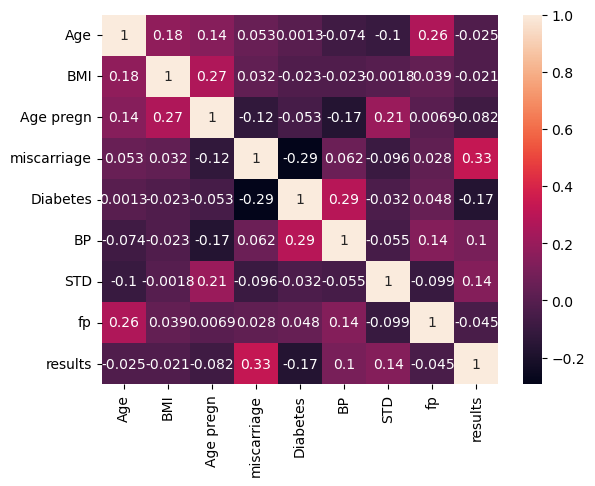

In [124]:
sns.heatmap(correlation,annot = True)

In [125]:
dataset.head()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp,results
0,1,0,0,2,2,2,0,3,0
1,2,1,1,0,1,2,0,0,1
2,1,1,0,0,2,2,0,3,0
3,2,2,2,0,0,1,1,1,1
4,2,2,0,2,0,2,0,0,0


<AxesSubplot:xlabel='results', ylabel='Age'>

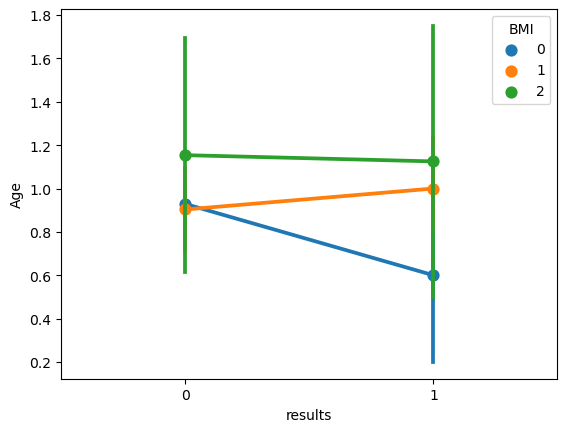

In [126]:
## Does Diabetes in Pregnancy depend on Age?
sns.pointplot(dataset['results'],dataset['Age'],hue=dataset['BMI'])

<AxesSubplot:xlabel='Age', ylabel='count'>

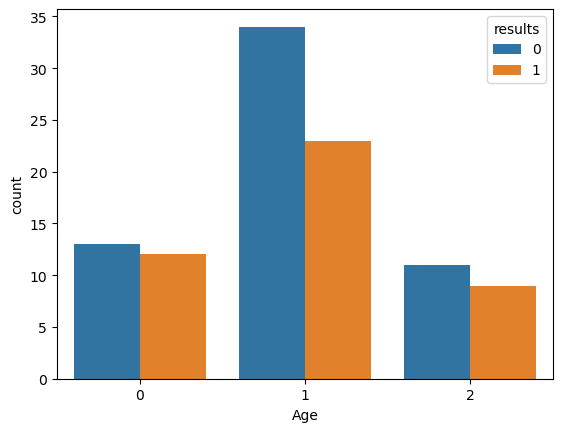

In [127]:
# To find max pregmancy women who were Diabetic
sns.countplot(dataset['Age'],hue=dataset['results'])

<AxesSubplot:xlabel='miscarriage', ylabel='count'>

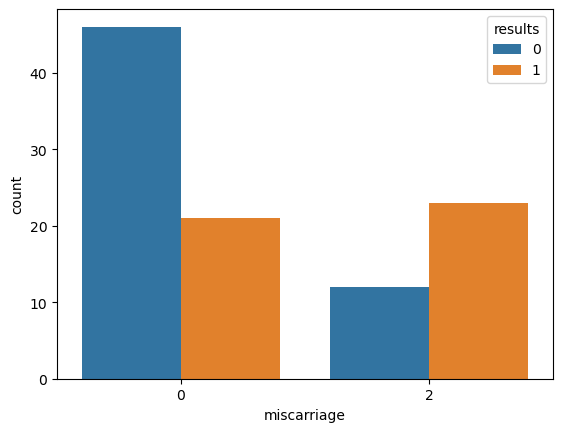

In [128]:
# To find max pregmancy women who were Diabetic
sns.countplot(dataset['miscarriage'],hue=dataset['results'])

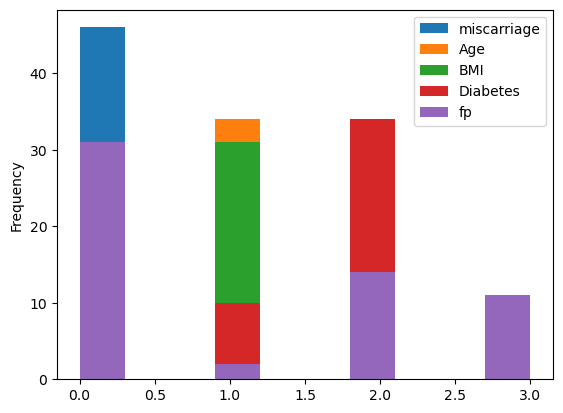

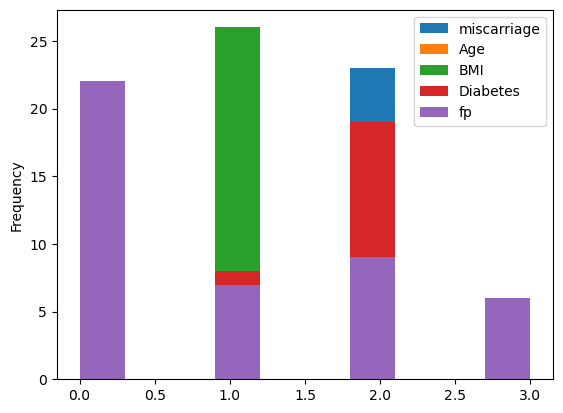

In [129]:
grouped_data=dataset.groupby('results')[['miscarriage','Age','BMI','Diabetes','fp']].plot.hist()

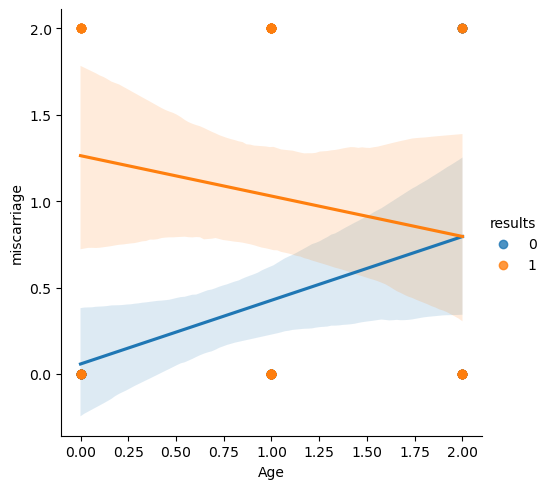

In [130]:
## Find if there is linear relation ship between indpendent variables and outcome
sns.lmplot('Age','miscarriage',hue='results',data=dataset)

<AxesSubplot:xlabel='Age', ylabel='Density'>

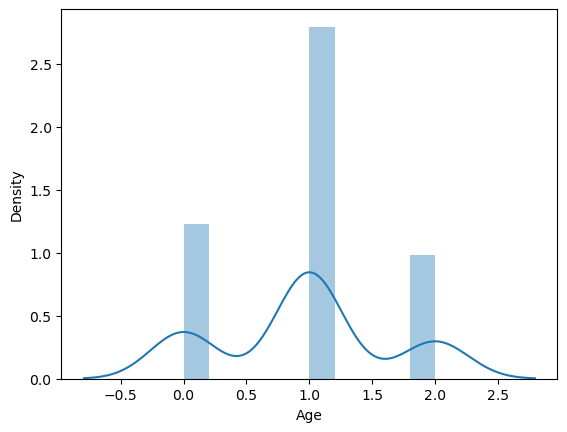

In [131]:
sns.distplot(dataset['Age'],bins=10)

<AxesSubplot:xlabel='Diabetes', ylabel='Density'>

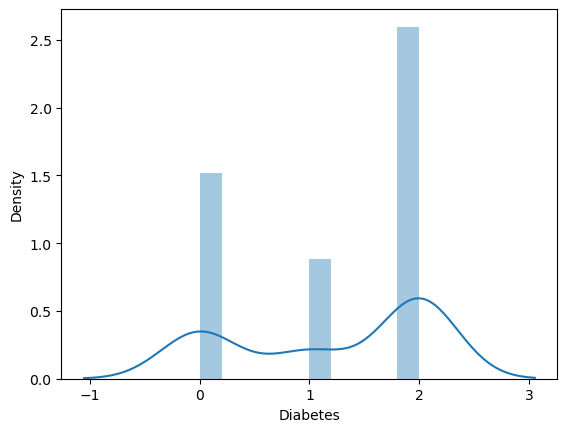

In [132]:
sns.distplot(dataset['Diabetes'],bins=10)

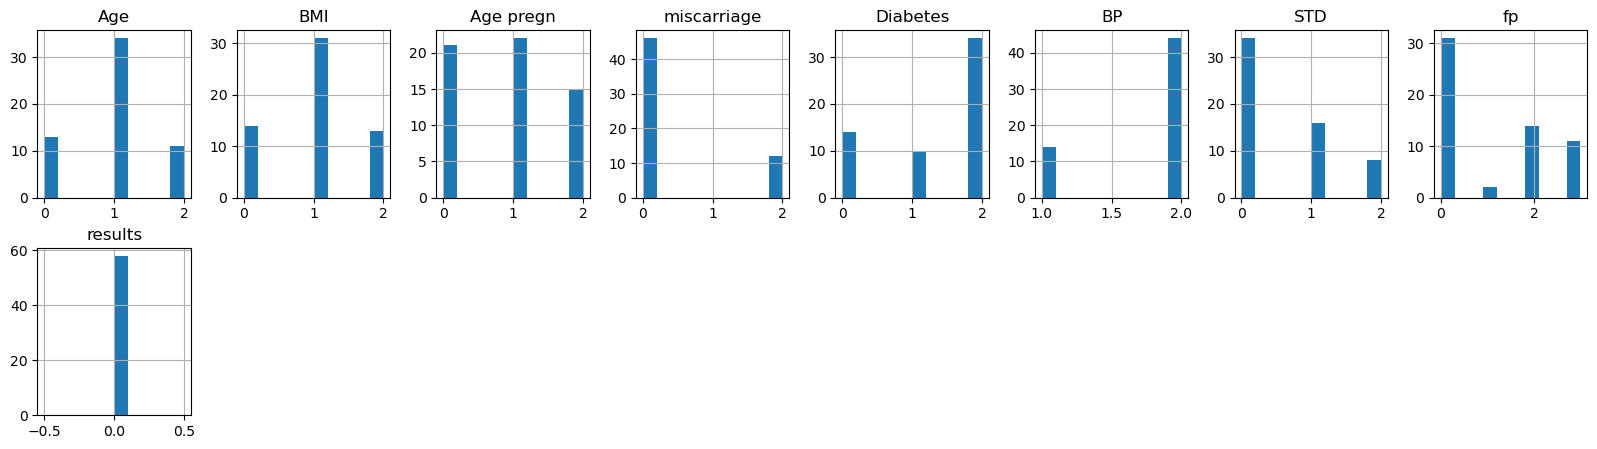

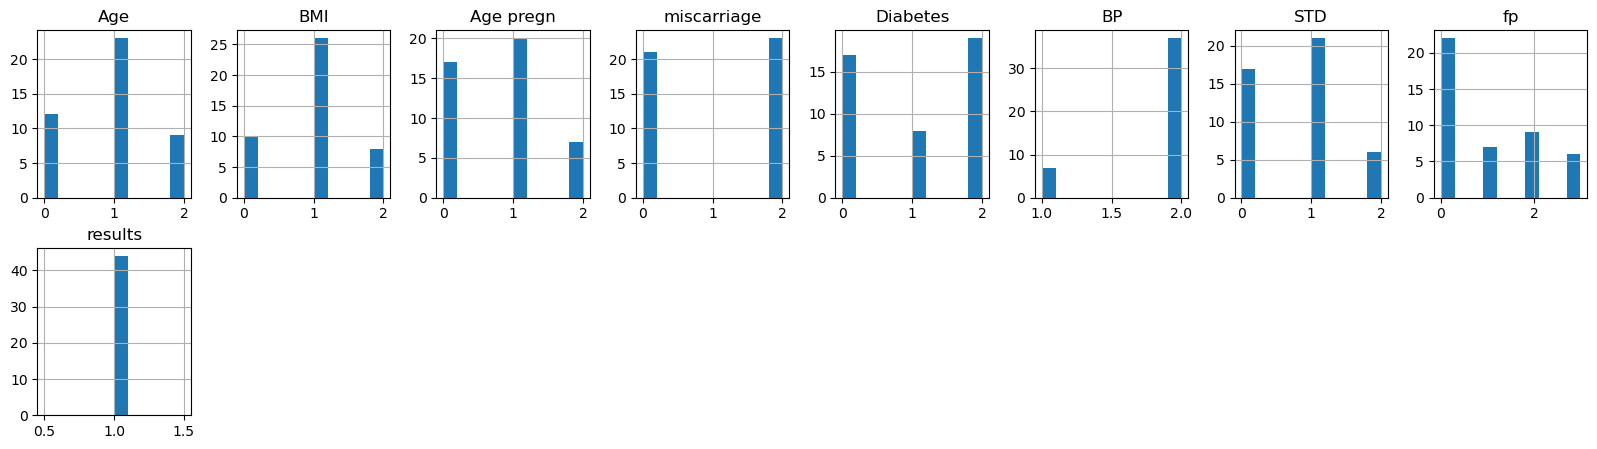

In [133]:
## See the variables with respect to outcome variable

dataset.groupby('results').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='miscarriage'>

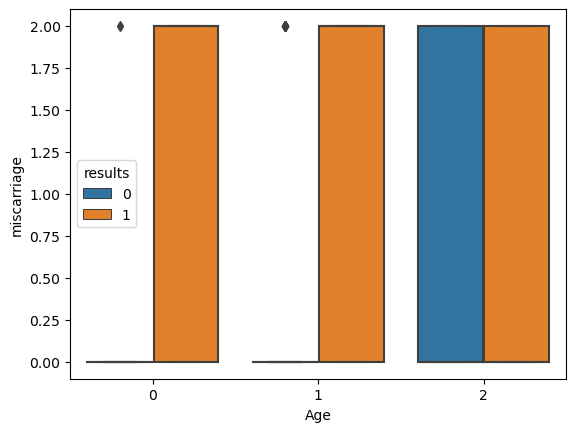

In [134]:
# Find the Glucose level in group of pregnant women who had diabetes.
sns.boxplot(x=dataset['Age'],y=dataset['miscarriage'],hue=dataset['results'])

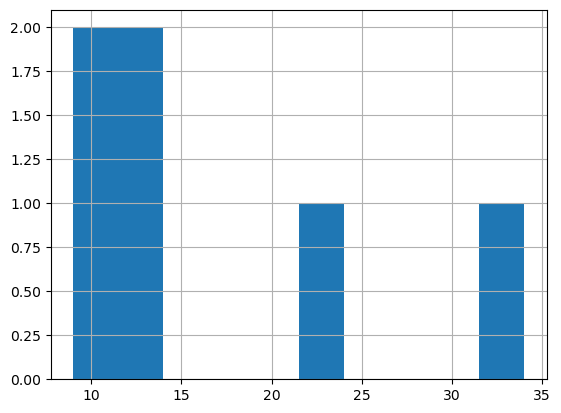

In [135]:
# How many pregnant women had BP?
dataset.groupby(['results','Age']).miscarriage.count().hist()
plt.show()

# Features Engineering

In [136]:
mydataset = dataset
print(mydataset)

     Age  BMI  Age pregn  miscarriage  Diabetes  BP  STD  fp  results
0      1    0          0            2         2   2    0   3        0
1      2    1          1            0         1   2    0   0        1
2      1    1          0            0         2   2    0   3        0
3      2    2          2            0         0   1    1   1        1
4      2    2          0            2         0   2    0   0        0
..   ...  ...        ...          ...       ...  ..  ...  ..      ...
97     1    1          1            2         0   2    0   2        1
98     0    0          0            2         1   2    1   0        1
99     0    1          1            2         0   2    1   2        1
100    1    0          0            2         0   2    0   2        0
101    2    0          1            2         0   2    1   0        1

[102 rows x 9 columns]


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import accuracy_score
import pickle

In [138]:
dataset.groupby('results').mean()

,Age,BMI,Age pregn,miscarriage,Diabetes,BP,STD,fp
results,,,,,,,,
0,0.965517,0.982759,0.896552,0.413793,1.344828,1.758621,0.551724,1.086207
1,0.931818,0.954545,0.772727,1.045455,1.045455,1.840909,0.750000,0.977273


In [139]:
x = dataset.drop(columns = 'results', axis=1)
y = dataset['results']

In [140]:
print(x)

     Age  BMI  Age pregn  miscarriage  Diabetes  BP  STD  fp
0      1    0          0            2         2   2    0   3
1      2    1          1            0         1   2    0   0
2      1    1          0            0         2   2    0   3
3      2    2          2            0         0   1    1   1
4      2    2          0            2         0   2    0   0
..   ...  ...        ...          ...       ...  ..  ...  ..
97     1    1          1            2         0   2    0   2
98     0    0          0            2         1   2    1   0
99     0    1          1            2         0   2    1   2
100    1    0          0            2         0   2    0   2
101    2    0          1            2         0   2    1   0

[102 rows x 8 columns]


In [141]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
97     1
98     1
99     1
100    0
101    1
Name: results, Length: 102, dtype: int32


Data Standardization

In [142]:
scaler = StandardScaler()

In [143]:
scaler.fit(x)

StandardScaler()

In [144]:
standardized_data = scaler.transform(x)

In [145]:
print(standardized_data)

[[ 0.07400305 -1.46269928 -1.12305615  1.38357714  0.88976811  0.50917508
  -0.8961469   1.65114547]
 [ 1.58366525  0.04432422  0.20894068 -0.72276418 -0.24468623  0.50917508
  -0.8961469  -0.8751071 ]
 [ 0.07400305  0.04432422 -1.12305615 -0.72276418  0.88976811  0.50917508
  -0.8961469   1.65114547]
 [ 1.58366525  1.55134773  1.54093751 -0.72276418 -1.37914057 -1.96396101
   0.51011439 -0.03302291]
 [ 1.58366525  1.55134773 -1.12305615  1.38357714 -1.37914057  0.50917508
  -0.8961469  -0.8751071 ]
 [ 0.07400305  0.04432422 -1.12305615 -0.72276418  0.88976811  0.50917508
   0.51011439 -0.8751071 ]
 [ 0.07400305 -1.46269928 -1.12305615  1.38357714 -0.24468623  0.50917508
  -0.8961469   0.80906128]
 [-1.43565915  1.55134773  0.20894068 -0.72276418 -0.24468623  0.50917508
   0.51011439 -0.8751071 ]
 [-1.43565915  0.04432422  1.54093751 -0.72276418  0.88976811  0.50917508
   1.91637567 -0.8751071 ]
 [ 0.07400305 -1.46269928 -1.12305615  1.38357714 -1.37914057  0.50917508
  -0.8961469   0.

In [146]:
x = standardized_data
y = dataset['results']

In [147]:
print(x)
print(y)

[[ 0.07400305 -1.46269928 -1.12305615  1.38357714  0.88976811  0.50917508
  -0.8961469   1.65114547]
 [ 1.58366525  0.04432422  0.20894068 -0.72276418 -0.24468623  0.50917508
  -0.8961469  -0.8751071 ]
 [ 0.07400305  0.04432422 -1.12305615 -0.72276418  0.88976811  0.50917508
  -0.8961469   1.65114547]
 [ 1.58366525  1.55134773  1.54093751 -0.72276418 -1.37914057 -1.96396101
   0.51011439 -0.03302291]
 [ 1.58366525  1.55134773 -1.12305615  1.38357714 -1.37914057  0.50917508
  -0.8961469  -0.8751071 ]
 [ 0.07400305  0.04432422 -1.12305615 -0.72276418  0.88976811  0.50917508
   0.51011439 -0.8751071 ]
 [ 0.07400305 -1.46269928 -1.12305615  1.38357714 -0.24468623  0.50917508
  -0.8961469   0.80906128]
 [-1.43565915  1.55134773  0.20894068 -0.72276418 -0.24468623  0.50917508
   0.51011439 -0.8751071 ]
 [-1.43565915  0.04432422  1.54093751 -0.72276418  0.88976811  0.50917508
   1.91637567 -0.8751071 ]
 [ 0.07400305 -1.46269928 -1.12305615  1.38357714 -1.37914057  0.50917508
  -0.8961469   0.

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2 )

In [149]:
print(x.shape,x_train.shape,x_test.shape)

(102, 8) (81, 8) (21, 8)


# Linear Regrastion

In [150]:
# loading the linear regression model 
lin_reg_model = LinearRegression()  

In [151]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [152]:
# prediction on Training data 
training_data_prediction = lin_reg_model.predict(x_train)

In [153]:
print(training_data_prediction)

[0.36932206 0.19286324 0.8264631  0.21160336 0.26870107 0.12558817
 0.68233854 0.30797609 0.21553676 0.69186941 0.76279598 0.31780726
 0.72363687 0.23277857 0.23101512 0.46674134 0.44674896 0.35037623
 0.33854554 0.78810551 0.36932206 0.43478163 0.45648322 0.22883061
 0.28298586 0.45433003 0.51812703 0.36468174 0.46009117 0.20746904
 0.83415332 0.51422741 0.4765725  0.37602578 0.25958641 0.2427961
 0.62625249 0.70569827 0.44254906 0.38967198 0.43296846 0.18478095
 0.50621974 0.33427828 0.34732818 0.73943625 0.19874644 0.41812563
 0.80422419 0.73134782 0.539937   0.56736233 0.93992029 0.3272015
 0.62558085 0.23277857 0.17721889 0.32325353 0.53546266 0.19874644
 0.21943637 0.63860819 0.24084629 0.51210294 0.37690313 0.35627401
 0.39782776 0.5014451  0.45648322 0.66949619 0.33854554 0.1653692
 0.47872569 0.30827639 0.59845815 0.64135595 0.33654738 0.20746904
 0.23277857 0.28296686 0.6797171 ]


# Logistic Regration

In [154]:
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(x_train, y_train)
LR_predict = LR.predict(x_test)

print('The Logistic Regression F1-score score is {}'.format(f1_score(y_test,LR_predict,average='weighted')))
print('The Logistic Regression Accuracy score is {}'.format(accuracy_score(y_test,LR_predict)))

The Logistic Regression F1-score score is 0.5142857142857141
The Logistic Regression Accuracy score is 0.6190476190476191


# Random Forest Classifier

In [155]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(x_train, y_train)

RF_predict = clf.predict(x_test)

print('The  RFC F1-score score is {}'.format(f1_score(y_test,RF_predict,average='weighted')))
print('The  RFC Accuracy score is {}'.format(accuracy_score(y_test,RF_predict)))

The  RFC F1-score score is 0.7074175824175823
The  RFC Accuracy score is 0.7142857142857143


# K-Nearest Neighbor(KNN)

In [150]:
Ks = 8
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    KNN_predict=neigh.predict(x_test)
    
    print('The  KNN F1-score score is {}'.format(f1_score(y_test,KNN_predict,average='weighted')))
    print('The  KNN Accuracy score is {}'.format(accuracy_score(y_test,KNN_predict)))

The  KNN F1-score score is 0.6190476190476191
The  KNN Accuracy score is 0.6190476190476191
The  KNN F1-score score is 0.5918367346938774
The  KNN Accuracy score is 0.6190476190476191
The  KNN F1-score score is 0.5733899967309578
The  KNN Accuracy score is 0.5714285714285714
The  KNN F1-score score is 0.5523809523809523
The  KNN Accuracy score is 0.5714285714285714
The  KNN F1-score score is 0.5123626373626373
The  KNN Accuracy score is 0.5238095238095238
The  KNN F1-score score is 0.6312997347480105
The  KNN Accuracy score is 0.6666666666666666
The  KNN F1-score score is 0.6938775510204082
The  KNN Accuracy score is 0.7142857142857143


# selecting Best model

In [159]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [214]:
#loading model 
mymodal = pickle.load(open('pregnancy_model.pkl', 'rb'))

In [182]:
data = mymodal.predict(x_test)

In [184]:
print(data)

[0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1]


In [207]:
# data testing x_test row 97 

row = [[1,1,1,2,0,2,0,2]]

In [217]:
output = mymodal.predict(row)

In [218]:
print(output[0])

1


In [219]:
# data testing x_test row 100
row2 = [[1,0,0,2,0,2,0,2]]

In [220]:
output = mymodal.predict(row2)

In [221]:
print(output[0])

0


# Thank youuuuuuu

Pregnancy MOdel Developed by Alex  Mwakalikamo